## Data Preprocessing

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_excel('data_academic_performance.xlsx')

In [176]:
df.sample(10)

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
8730,SB11201320280567,F,Incomplete Secundary,Complete Secundary,Independent,Independent,Stratum 3,It is not classified by the SISBEN,Five,NaN,...,67,40,93,130,165,78,4,4,2,4
1360,SB11201220181699,M,Complete Secundary,Complete Secundary,Independent,Home,Stratum 1,Level 1,Four,NaN,...,32,45,10,159,150,56,3,3,2,2
9781,SB11201320401370,M,Complete Secundary,Postgraduate education,Operator,Technical or professional level employee,Stratum 2,It is not classified by the SISBEN,Four,NaN,...,51,71,44,100,152,59,3,3,4,2
11881,SB11201420149544,M,Complete technique or technology,Complete Secundary,Small entrepreneur,Home,Stratum 3,Level 3,Five,NaN,...,15,65,79,79,167,79,4,4,2,3
1165,SB11201220122264,M,Complete Secundary,Complete Secundary,Other occupation,Operator,Stratum 2,It is not classified by the SISBEN,Two,NaN,...,74,73,62,98,173,86,5,4,2,2
4665,SB11201310080253,M,Complete professional education,Complete professional education,0,Executive,Stratum 4,It is not classified by the SISBEN,Four,NaN,...,22,74,93,139,159,70,4,3,4,4
3878,SB11201220524600,F,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,Five,NaN,...,33,83,99,156,157,67,4,3,4,2
6708,SB11201320126017,M,Incomplete Secundary,Incomplete primary,Operator,Home,Stratum 1,Level 1,Four,NaN,...,69,19,86,150,165,78,4,4,1,1
2148,SB11201220302079,M,Complete primary,Complete primary,Independent,Home,Stratum 2,Level 2,Three,NaN,...,76,44,64,156,158,68,4,3,1,2
11932,SB11201420173476,M,Complete Secundary,Incomplete Secundary,Operator,Home,Stratum 3,Level 1,Four,NaN,...,84,58,37,185,175,87,5,4,2,3


In [177]:
print(f"Nulls:\n{df.isnull().sum()}")
print(f"Duplicates:\n {df.duplicated().sum()}")

Nulls:
COD_S11                 0
GENDER                  0
EDU_FATHER              0
EDU_MOTHER              0
OCC_FATHER              0
OCC_MOTHER              0
STRATUM                 0
SISBEN                  0
PEOPLE_HOUSE            0
Unnamed: 9          12411
INTERNET                0
TV                      0
COMPUTER                0
WASHING_MCH             0
MIC_OVEN                0
CAR                     0
DVD                     0
FRESH                   0
PHONE                   0
MOBILE                  0
REVENUE                 0
JOB                     0
SCHOOL_NAME             0
SCHOOL_NAT              0
SCHOOL_TYPE             0
MAT_S11                 0
CR_S11                  0
CC_S11                  0
BIO_S11                 0
ENG_S11                 0
Cod_SPro                0
UNIVERSITY              0
ACADEMIC_PROGRAM        0
QR_PRO                  0
CR_PRO                  0
CC_PRO                  0
ENG_PRO                 0
WC_PRO                  0
FEP_P

In [178]:
df.drop(columns=['Unnamed: 9'], inplace=True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COD_S11           12411 non-null  object
 1   GENDER            12411 non-null  object
 2   EDU_FATHER        12411 non-null  object
 3   EDU_MOTHER        12411 non-null  object
 4   OCC_FATHER        12411 non-null  object
 5   OCC_MOTHER        12411 non-null  object
 6   STRATUM           12411 non-null  object
 7   SISBEN            12411 non-null  object
 8   PEOPLE_HOUSE      12411 non-null  object
 9   INTERNET          12411 non-null  object
 10  TV                12411 non-null  object
 11  COMPUTER          12411 non-null  object
 12  WASHING_MCH       12411 non-null  object
 13  MIC_OVEN          12411 non-null  object
 14  CAR               12411 non-null  object
 15  DVD               12411 non-null  object
 16  FRESH             12411 non-null  object
 17  PHONE       

In [180]:
import pandas as pd
import numpy as np

missing_saber_pro = df[df['Cod_SPro'].isna() | (df['Cod_SPro'] == '') | (df['Cod_SPro'] == 0)]

print(f"Number of records with missing SABER PRO IDs: {len(missing_saber_pro)}")
print("\nSample of records with missing SABER PRO IDs:")
print(missing_saber_pro.head())

saber11_duplicates = df[df.duplicated(subset=['COD_S11'], keep=False)]
print(f"\nNumber of records with duplicate SABER 11 IDs: {len(saber11_duplicates)}")
if len(saber11_duplicates) > 0:
    print("\nSample of duplicate SABER 11 ID records:")
    print(saber11_duplicates.sort_values('COD_S11').head())

saberpro_duplicates = df[df.duplicated(subset=['Cod_SPro'], keep=False)]
print(f"\nNumber of records with duplicate SABER PRO IDs: {len(saberpro_duplicates)}")
if len(saberpro_duplicates) > 0:
    print("\nSample of duplicate SABER PRO ID records:")
    print(saberpro_duplicates.sort_values('Cod_SPro').head())

def keep_most_recent_record():
    duplicate_mask = df.duplicated(subset=['Cod_SPro'], keep=False)
    duplicates = df[duplicate_mask].copy()
    non_duplicates = df[~duplicate_mask].copy()
    duplicates['S11_Year'] = duplicates['COD_S11'].str[4:8].astype(int)
    
    keep_rows = []
    for saber_pro_id, group in duplicates.groupby('Cod_SPro'):
        most_recent = group.loc[group['S11_Year'].idxmax()]
        keep_rows.append(most_recent)
    
    filtered_df = pd.concat([non_duplicates, pd.DataFrame(keep_rows)])
    
    if 'S11_Year' in filtered_df.columns:
        filtered_df = filtered_df.drop(columns=['S11_Year'])
    
    return filtered_df
df = keep_most_recent_record()
print(f"Filtered DataFrame shape: {df.shape}")

Number of records with missing SABER PRO IDs: 0

Sample of records with missing SABER PRO IDs:
Empty DataFrame
Columns: [COD_S11, GENDER, EDU_FATHER, EDU_MOTHER, OCC_FATHER, OCC_MOTHER, STRATUM, SISBEN, PEOPLE_HOUSE, INTERNET, TV, COMPUTER, WASHING_MCH, MIC_OVEN, CAR, DVD, FRESH, PHONE, MOBILE, REVENUE, JOB, SCHOOL_NAME, SCHOOL_NAT, SCHOOL_TYPE, MAT_S11, CR_S11, CC_S11, BIO_S11, ENG_S11, Cod_SPro, UNIVERSITY, ACADEMIC_PROGRAM, QR_PRO, CR_PRO, CC_PRO, ENG_PRO, WC_PRO, FEP_PRO, G_SC, PERCENTILE, 2ND_DECILE, QUARTILE, SEL, SEL_IHE]
Index: []

[0 rows x 44 columns]

Number of records with duplicate SABER 11 IDs: 0

Number of records with duplicate SABER PRO IDs: 32

Sample of duplicate SABER PRO ID records:
               COD_S11 GENDER                             EDU_FATHER  \
6524  SB11201320110284      M  Incomplete technical or technological   
2259  SB11201220313289      M                                      0   
8035  SB11201320225581      F      Incomplete Professional Education   

In [181]:
df.rename(columns={'MAT_S11': 'Math_S11',
                   'CR_S11': 'Critical Reading_S11', 
                   'CC_S11': 'Citizen Competencies_S11',
                   'BIO_S11': 'Biology_S11', 
                   'ENG_S11': 'English_S11',
                   'QR_PRO': 'Quantitative Reasoning_PRO',
                   'CR_PRO': 'Critical Reading_PRO',
                   'CC_PRO': 'Citizen Competencies_PRO',
                   'ENG_PRO': 'English_PRO',
                   'WC_PRO': 'Written Communication_PRO',
                   'FEP_PRO': 'Formulation of Engineering Projects_PRO',
                   'SEL': 'Socioeconomic Level',
                   'SEL_IHE': 'Socioeconomic Level of The Institution of Higher Education'}, inplace=True)

In [182]:
df.describe()

,Math_S11,Critical Reading_S11,Citizen Competencies_S11,Biology_S11,English_S11,Quantitative Reasoning_PRO,Critical Reading_PRO,Citizen Competencies_PRO,English_PRO,Written Communication_PRO,Formulation of Engineering Projects_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,Socioeconomic Level,Socioeconomic Level of The Institution of Higher Education
count,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,64.326261,60.782896,60.709238,63.958935,61.804599,77.419766,62.214603,59.200726,67.504316,53.723921,145.495200,162.724002,68.461880,3.886325,3.189351,2.598790,2.409359
std,11.876539,10.026175,10.121873,11.155950,14.300620,22.678590,27.657494,28.989655,25.488274,29.993318,40.131322,23.109625,25.862181,1.248166,0.978822,1.111929,0.926930
min,26.000000,24.000000,0.000000,11.000000,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,56.000000,54.000000,54.000000,56.000000,50.000000,65.000000,42.000000,36.000000,51.000000,28.000000,124.000000,147.000000,51.000000,3.000000,3.000000,2.000000,2.000000
50%,64.000000,61.000000,60.000000,64.000000,59.000000,85.000000,67.000000,65.000000,74.000000,56.000000,153.000000,163.000000,75.000000,4.000000,4.000000,2.000000,2.000000
75%,72.000000,67.000000,67.000000,71.000000,72.000000,96.000000,86.000000,85.000000,88.000000,80.000000,174.000000,179.000000,90.000000,5.000000,4.000000,4.000000,3.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,247.000000,100.000000,5.000000,4.000000,4.000000,4.000000


In [183]:
numeric_columns = [
    "Math_S11", "Critical Reading_S11", "Citizen Competencies_S11", "Biology_S11", "English_S11",
    "Quantitative Reasoning_PRO", "Critical Reading_PRO", "Citizen Competencies_PRO", "English_PRO",
    "Written Communication_PRO", "Formulation of Engineering Projects_PRO", "PERCENTILE",
    "2ND_DECILE", "QUARTILE", "Socioeconomic Level",
    "Socioeconomic Level of The Institution of Higher Education"
]

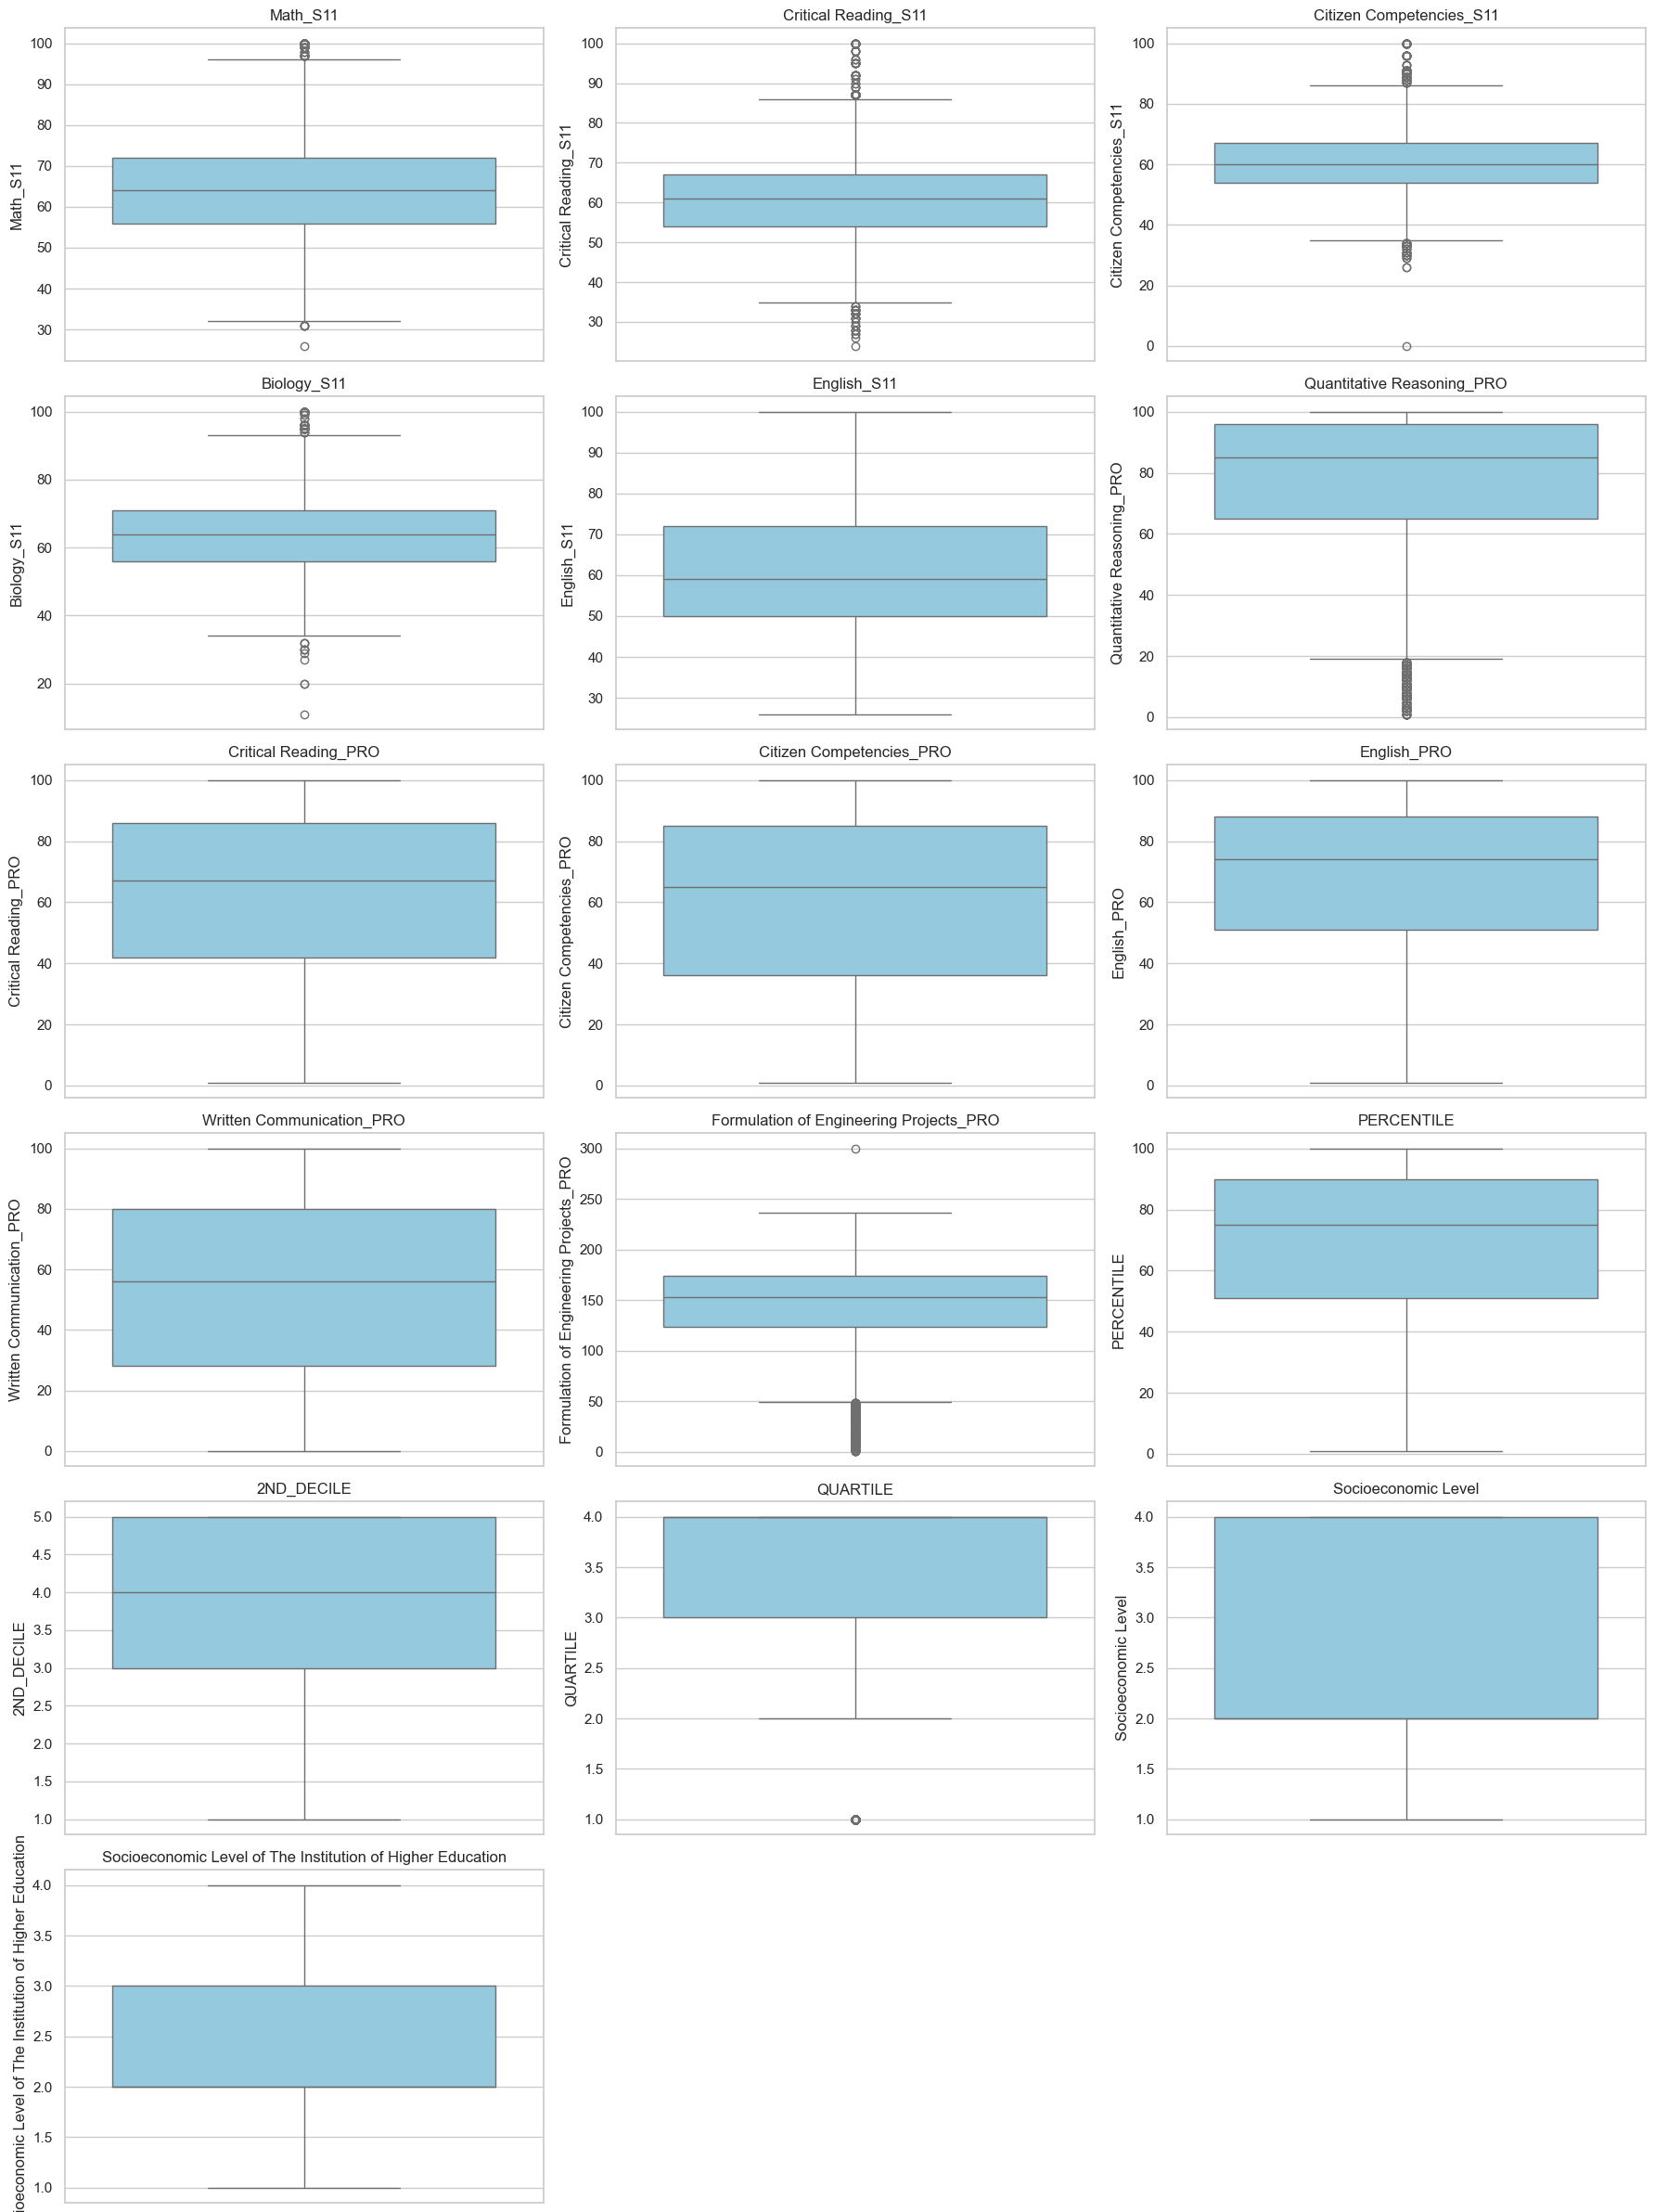

In [184]:
sns.set(style="whitegrid")

def plot_boxplots(df, numeric_columns):
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 2) // 3  # Adjust rows based on number of plots

    plt.figure(figsize=(18, num_rows * 4))

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(data=df, y=col, color="skyblue")
        plt.title(col)
        plt.tight_layout()

    plt.show()

plot_boxplots(df, numeric_columns)


In [185]:
import pandas as pd
from functools import reduce

def get_unique_value_counts_df(df, columns):
    value_counts_dfs = []
    
    for col in columns:
        counts_df = (
            df[col]
            .value_counts(dropna=True)
            .reset_index()
            .rename(columns={'index': f'{col}', col: f'{col}_COUNT'})
        )
        value_counts_dfs.append(counts_df)
   
    merged_df = pd.concat(value_counts_dfs, axis=1)

    return merged_df


In [186]:
columns_to_check = ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER']
nan_counts = df[columns_to_check].isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
EDU_FATHER    0
EDU_MOTHER    0
OCC_FATHER    0
OCC_MOTHER    0
dtype: int64


In [187]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])


,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015,Complete Secundary,3106,Independent,2907,Home,4650
1,Complete Secundary,2842,Complete professional education,3059,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193,Complete technique or technology,1493,Operator,1537,Independent,1107
3,Incomplete Secundary,1091,Incomplete Secundary,1056,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084,Postgraduate education,995,Executive,1076,Executive,793
5,Complete primary,823,Complete primary,712,0,928,Independent professional,715
6,Incomplete primary,731,Incomplete primary,538,Independent professional,914,Operator,684
7,Incomplete Professional Education,425,Incomplete Professional Education,502,Small entrepreneur,692,Other occupation,607
8,Not sure,407,0,380,Retired,532,Small entrepreneur,492
9,0,384,Incomplete technical or technological,341,Entrepreneur,471,0,306


In [188]:
df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)

df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)

df['OCC_FATHER'] = df['OCC_FATHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)
df['OCC_MOTHER'] = df['OCC_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)


In [189]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])

,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015.0,Complete Secundary,3106.0,Independent,2907,Home,4650
1,Complete Secundary,2842.0,Complete professional education,3059.0,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193.0,Complete technique or technology,1493.0,Operator,1537,Independent,1107
3,Incomplete Secundary,1091.0,Incomplete Secundary,1056.0,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084.0,Postgraduate education,995.0,Executive,1076,Executive,793
5,Complete primary,823.0,Complete primary,712.0,Unknown,928,Independent professional,715
6,Unknown,791.0,Unknown,559.0,Independent professional,914,Operator,684
7,Incomplete primary,731.0,Incomplete primary,538.0,Small entrepreneur,692,Other occupation,607
8,Incomplete Professional Education,425.0,Incomplete Professional Education,502.0,Retired,532,Small entrepreneur,492
9,Incomplete technical or technological,277.0,Incomplete technical or technological,341.0,Entrepreneur,471,Unknown,306


In [190]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,It is not classified by the SISBEN,7521.0,Stratum 3,4038
1,Level 2,2118.0,Stratum 2,4026
2,Level 1,2056.0,Stratum 1,1707
3,Level 3,583.0,Stratum 4,1575
4,Esta clasificada en otro Level del SISBEN,96.0,Stratum 5,632
5,0,21.0,Stratum 6,403
6,NaN,NaN,0,14


In [191]:
def handle_sisben(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str):
        x = x.strip().lower()
        if x == '0' or 'it is not classified by the sisben' in x or 'esta clasificada en otro level del sisben' in x:
            return 'Unknown'
    return x

def handle_stratum(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str) and x.strip() == '0':
        return 'Unknown'
    return x

df['SISBEN'] = df['SISBEN'].apply(handle_sisben)
df['STRATUM'] = df['STRATUM'].apply(handle_stratum)

In [192]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,Unknown,7638.0,Stratum 3,4038
1,level 2,2118.0,Stratum 2,4026
2,level 1,2056.0,Stratum 1,1707
3,level 3,583.0,Stratum 4,1575
4,NaN,NaN,Stratum 5,632
5,NaN,NaN,Stratum 6,403
6,NaN,NaN,Unknown,14


In [193]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,0,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,0,276.0,NaN,NaN,NaN,NaN,Nueve,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,Twelve or more,32


In [194]:
df['JOB'] = df['JOB'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )
df['REVENUE'] = df['REVENUE'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )

df = df[df['PEOPLE_HOUSE'] != '0']

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Nueve': 'Nine'})

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Once': 'One'})

In [195]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,Unknown,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,Unknown,276.0,NaN,NaN,NaN,NaN,Nine,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,One,32


Encoding

In [196]:

def apply_binning_to_dataframe(df):
    """
    Apply education and occupation binning to the dataframe
    """
    # Make a copy to avoid modifying the original
    result_df = df.copy()
    
    # Apply education binning
    result_df['EDU_FATHER_BIN'] = result_df['EDU_FATHER'].apply(bin_education_level)
    result_df['EDU_MOTHER_BIN'] = result_df['EDU_MOTHER'].apply(bin_education_level)
    
    # Apply occupation binning
    result_df['OCC_FATHER_BIN'] = result_df['OCC_FATHER'].apply(bin_occupation)
    result_df['OCC_MOTHER_BIN'] = result_df['OCC_MOTHER'].apply(bin_occupation)
    
    return result_df


def bin_education_level(education_str):
    """
    Bins education levels into 6 categories:
    0 - No/Unknown Education
    1 - Primary
    2 - Secondary
    3 - Technical/Technological
    4 - University/Professional
    5 - Postgraduate
    """
    # Input already preprocessed
    education = str(education_str)
    
    # 0 - No/Unknown Education
    if 'no education' in education.lower() or 'unknown' in education.lower():
        return 0
        
    # 1 - Primary
    if 'primary' in education.lower():
        return 1
        
    # 2 - Secondary
    if 'secondary' in education.lower():
        return 2
        
    # 3 - Technical/Technological
    if 'techn' in education.lower():
        return 3
        
    # 4 - University/Professional
    if 'professional' in education.lower():
        return 4
        
    # 5 - Postgraduate
    if 'postgraduate' in education.lower():
        return 5
        
    # Default to 0 for any unrecognized values
    return 0

def bin_occupation(occupation_str):
    """
    Bins occupation levels into categories:
    0 - Unknown/Missing
    1 - Home/Retired
    2 - Manual Labor (Operator, Small entrepreneur)
    3 - Administrative/Auxiliary
    4 - Technical/Professional
    5 - Executive/Management
    """
    # Input already preprocessed
    occupation = str(occupation_str)
    # 0 - Unknown/Missing
    if occupation.lower() == 'unknown':
        return 0
        
    # 1 - Home/Retired
    if 'home' in occupation.lower() or 'retired' in occupation.lower():
        return 1
        
    # 2 - Manual Labor
    if 'operator' in occupation.lower() or 'entrepreneur' in occupation.lower():
        return 2
        
    # 3 - Administrative/Auxiliary
    if 'admin' in occupation.lower() or 'auxiliary' in occupation.lower():
        return 3
        
    # 4 - Technical/Professional
    if 'technical' in occupation.lower() or 'professional' in occupation.lower():
        return 4
        
    # 5 - Executive/Management
    if 'executive' in occupation.lower():
        return 5
        
    # Default value for other occupations
    return 0

# Apply binning directly to the dataframe columns
df['EDU_FATHER_BIN'] = df['EDU_FATHER'].apply(bin_education_level)
df['EDU_MOTHER_BIN'] = df['EDU_MOTHER'].apply(bin_education_level)
df['OCC_FATHER_BIN'] = df['OCC_FATHER'].apply(bin_occupation)
df['OCC_MOTHER_BIN'] = df['OCC_MOTHER'].apply(bin_occupation)

# Example usage
# Assuming df is your dataframe with the columns 'EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'
df = apply_binning_to_dataframe(df)


In [197]:
df = df.drop(columns=['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER', 'Cod_SPro', 'COD_S11'])

In [198]:
def frequency_encode(df, column):

    freq = df[column].value_counts(normalize=True)
    return df[column].map(freq)

def one_hot_encode(df, column):
    one_hot = pd.get_dummies(df[column], prefix=column, dtype=int)
    return one_hot


# GENDER
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1}) 

# PEOPLE_HOUSE


df['PEOPLE_HOUSE'] = frequency_encode(df, 'PEOPLE_HOUSE')

# STRATUM, SISBEN
import pandas as pd


one_hot_stratum = one_hot_encode(df, 'STRATUM')
one_hot_sisben = one_hot_encode(df, 'SISBEN')
df = pd.concat([df, one_hot_stratum, one_hot_sisben], axis=1)
df.drop(columns=['STRATUM', 'SISBEN'], inplace=True)

# DEVICES
device_columns = ['DVD', 'FRESH', 'PHONE', 'MOBILE', 'CAR','MIC_OVEN','WASHING_MCH','COMPUTER','TV','INTERNET']
for col in device_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

#REVENUE
one_hot_revenue = one_hot_encode(df, 'REVENUE')
df = pd.concat([df, one_hot_revenue], axis=1)
df.drop(columns=['REVENUE'], inplace=True)

# JOB
one_hot_job = one_hot_encode(df, 'JOB')
df = pd.concat([df, one_hot_job], axis=1)
df.drop(columns=['JOB'], inplace=True)

# SCHOOL_NAME
frequency_encode(df, 'SCHOOL_NAME')
df['SCHOOL_NAME'] = frequency_encode(df, 'SCHOOL_NAME')

# SCHOOL_TYPE
one_hot_school_type = one_hot_encode(df, 'SCHOOL_TYPE')
df = pd.concat([df, one_hot_school_type], axis=1)
df.drop(columns=['SCHOOL_TYPE'], inplace=True)

# SCHOOL_NAT
one_hot_school_nat = one_hot_encode(df, 'SCHOOL_NAT')
df = pd.concat([df, one_hot_school_nat], axis=1)
df.drop(columns=['SCHOOL_NAT'], inplace=True)




In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12395 entries, 0 to 7430
Data columns (total 65 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   GENDER                                                      12395 non-null  int64  
 1   PEOPLE_HOUSE                                                12395 non-null  float64
 2   INTERNET                                                    12395 non-null  int64  
 3   TV                                                          12395 non-null  int64  
 4   COMPUTER                                                    12395 non-null  int64  
 5   WASHING_MCH                                                 12395 non-null  int64  
 6   MIC_OVEN                                                    12395 non-null  int64  
 7   CAR                                                         12395 non-null  int64  
 8   DV

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import joblib
import time

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
# Since you've already preprocessed the data, I'll assume df is your DataFrame
# For feature selection, we'll exclude the target and some non-predictive columns
features = [
    'GENDER', 'PEOPLE_HOUSE', 'INTERNET', 'TV', 'COMPUTER', 'WASHING_MCH', 
    'MIC_OVEN', 'CAR', 'DVD', 'FRESH', 'PHONE', 'MOBILE', 
    'Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11', 
    'Biology_S11', 'English_S11', 'EDU_FATHER_BIN', 'EDU_MOTHER_BIN',
    'OCC_FATHER_BIN', 'OCC_MOTHER_BIN', 'STRATUM_Stratum 1', 'STRATUM_Stratum 2', 
    'STRATUM_Stratum 3', 'STRATUM_Stratum 4', 'STRATUM_Stratum 5', 
    'STRATUM_Stratum 6', 'STRATUM_Unknown', 'SISBEN_Unknown', 'SISBEN_level 1', 
    'SISBEN_level 2', 'SISBEN_level 3', 'REVENUE_10 or more LMMW', 
    'REVENUE_Between 1 and less than 2 LMMW', 'REVENUE_Between 2 and less than 3 LMMW',
    'REVENUE_Between 3 and less than 5 LMMW', 'REVENUE_Between 5 and less than 7 LMMW',
    'REVENUE_Between 7 and less than 10 LMMW', 'REVENUE_Unknown', 
    'REVENUE_less than 1 LMMW', 'JOB_No', 'JOB_Unknown', 
    'JOB_Yes, 20 hours or more per week', 'JOB_Yes, less than 20 hours per week',
    'SCHOOL_TYPE_ACADEMIC', 'SCHOOL_TYPE_Not apply', 'SCHOOL_TYPE_TECHNICAL',
    'SCHOOL_TYPE_TECHNICAL/ACADEMIC', 'SCHOOL_NAT_PRIVATE', 'SCHOOL_NAT_PUBLIC'
]
# Prepare data for modeling
X = df[feature_cols]
y = df['ACADEMIC_PROGRAM']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Number of unique classes: {len(y.unique())}")

# Create a function to evaluate and compare models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    
    # For cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    return model, accuracy, y_pred

# Function to plot feature importances for tree-based models
def plot_feature_importance(model, feature_names, top_n=20):
    if hasattr(model, 'feature_importances_'):
        # Get feature importances
        importances = model.feature_importances_
        # Create DataFrame for visualization
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        
        # Plot top N features
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
        plt.title('Top Feature Importances')
        plt.tight_layout()
        plt.show()
        
        return feature_importance_df
    else:
        print("Model doesn't support feature importance visualization")
        return None

# Create a pipeline for scaling and modeling
# We'll try different models and compare their performance

# 1. Random Forest with GridSearch for hyperparameter tuning
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameters for Grid Search
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

print("Starting Random Forest hyperparameter tuning...")
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_model, rf_accuracy, rf_pred = evaluate_model(rf_grid, X_train, X_test, y_train, y_test, "Random Forest")

print(f"\nBest parameters for Random Forest: {rf_grid.best_params_}")

# 2. XGBoost with GridSearch
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
])

xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

print("\nStarting XGBoost hyperparameter tuning...")
xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_model, xgb_accuracy, xgb_pred = evaluate_model(xgb_grid, X_train, X_test, y_train, y_test, "XGBoost")

print(f"\nBest parameters for XGBoost: {xgb_grid.best_params_}")

# 3. SVM with RBF kernel (with scaling)
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

svm_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.1, 0.01]
}

print("\nStarting SVM hyperparameter tuning...")
svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
svm_model, svm_accuracy, svm_pred = evaluate_model(svm_grid, X_train, X_test, y_train, y_test, "SVM")

print(f"\nBest parameters for SVM: {svm_grid.best_params_}")

# Compare model performances
models = {
    'Random Forest': (rf_model, rf_accuracy),
    'XGBoost': (xgb_model, xgb_accuracy),
    'SVM': (svm_model, svm_accuracy)
}

# Find the best model
best_model_name = max(models.items(), key=lambda x: x[1][1])[0]
best_model = models[best_model_name][0]
print(f"\nBest model: {best_model_name} with accuracy: {models[best_model_name][1]:.4f}")

# Get the best model's predictions
best_predictions = None
if best_model_name == 'Random Forest':
    best_predictions = rf_pred
elif best_model_name == 'XGBoost':
    best_predictions = xgb_pred
else:
    best_predictions = svm_pred

# Create confusion matrix for the best model
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, best_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.tight_layout()
plt.show()

# Generate classification report
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_predictions))

# Feature importance for tree-based models
if best_model_name in ['Random Forest', 'XGBoost']:
    print("\nFeature Importance Analysis:")
    # Get the actual classifier from the pipeline
    classifier = best_model.best_estimator_.named_steps['classifier']
    feature_importance_df = plot_feature_importance(classifier, X.columns)
    print("\nTop 10 Important Features:")
    print(feature_importance_df.head(10))

# Save the best model
joblib.dump(best_model, 'best_academic_program_model.pkl')
print("\nBest model saved as 'best_academic_program_model.pkl'")

# Plot the model performance comparison
plt.figure(figsize=(10, 6))
model_names = list(models.keys())
accuracies = [models[name][1] for name in model_names]

# Create the bar plot
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)  # Adjust y-axis for better visualization

# Add the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'xgboost'